## Model definition

In [55]:
!pip install -q numpy torch --index-url https://download.pytorch.org/whl/cpu
!pip install -q scikit-learn pandas 

In [56]:
import torch.nn as nn

class GenderClassifier(nn.Module):

    def __init__(self, input_size: int, hidden1_size: int, hidden2_size: int, output_size: int):
        super(GenderClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, output_size)

        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))

        return x


### Load and prepare dataset

In [57]:
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch
import pandas as pd

df = pd.read_csv("data/hr_data_gold.csv")

label = 'Gender_Male'
features = [c for c in df.columns if c != label]

# create tensors
X = torch.tensor(df[features].values, dtype=torch.float32)
y = torch.tensor(df[label], dtype=torch.long)

# create tensor dataframe
ds = TensorDataset(X, y)

# split data
train_size = int(0.8 * len(ds))
test_size = len(ds) - train_size
ds_train, ds_test = random_split(ds, [train_size, test_size])

# create loaders
train_loader = DataLoader(ds_train, batch_size=32, shuffle=True)
test_loader = DataLoader(ds_test, batch_size=1, shuffle=True)

### Learn model 48 x 24

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

model = GenderClassifier(len(df.columns) - 1, 48, 24, 2)

train_accuracy_log = []
test_accuracy_log = []

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(1, 1001):
    # train
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
    # calculate train_ds and test_ds accuracy
    with torch.no_grad():
        train_features, train_labels = ds_train[0], ds_train[1]
        train_pred = [torch.argmax(model(X)) for X in train_features]
        train_accuracy = accuracy_score(train_labels, train_pred)
        train_accuracy_log.append(train_accuracy)

        test_features, test_labels = ds_test[0], ds_test[1]
        test_pred = [torch.argmax(model(X)) for X in test_features]
        test_accuracy = accuracy_score(test_labels, test_pred)
        test_accuracy_log.append(test_accuracy)

    print(f"Progress: {}")


### Learning curve

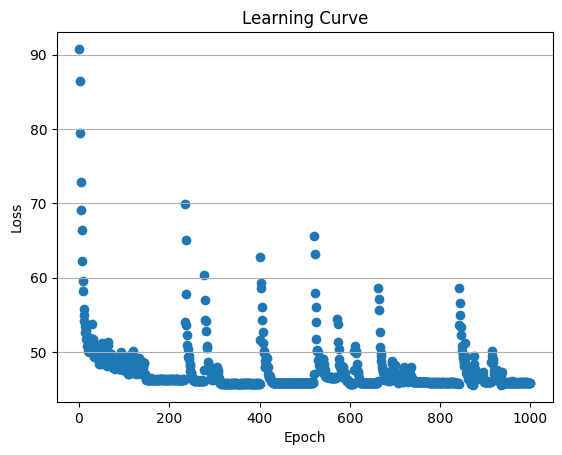

In [ ]:
!pip install -q matplotlib
import matplotlib.pyplot as plt

x = list(range(1, len(loss_log) + 1))

plt.figure(x, loss_log)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.grid(axis = 'y')
plt.show()


In [64]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for X, y in test_loader:
        outputs = model(X)
        preds = torch.argmax(outputs, dim=1)
        all_labels.append(y)
        all_preds.append(preds)


### Validation
- Accuracy
- Precusion
- Recall
- Confusion Matrix

In [61]:
# 48 x 24 lr 0.001 batch=32
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.9068
Precision: 0.9108
Recall: 0.9074
F1 Score: 0.9091
Confusion Matrix:
 [[463  48]
 [ 50 490]]


In [65]:
# 48 x 24 lr 0.005 batch=32
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9315
Precision: 0.9286
Recall: 0.9389
F1 Score: 0.9337
Confusion Matrix:
 [[472  39]
 [ 33 507]]
